In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
 
# for hypothesis testing
from scipy.stats import shapiro,normaltest,kstest
import statsmodels.api as sm

# for replace
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')
 

## Step 1 : Problem Statement

## Step 2: Data Gathering

In [3]:
df = pd.read_csv(r"D:\Jupyter python\My Python\CodeSoft\advertising.csv")  
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Step 3 : EDA(Exploratory Data Analysis)

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='Radio', ylabel='Density'>

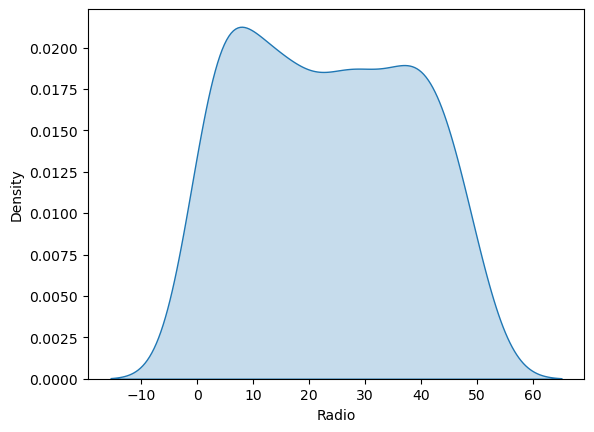

In [8]:
sns.kdeplot(df["Radio"], fill = True)

<Axes: >

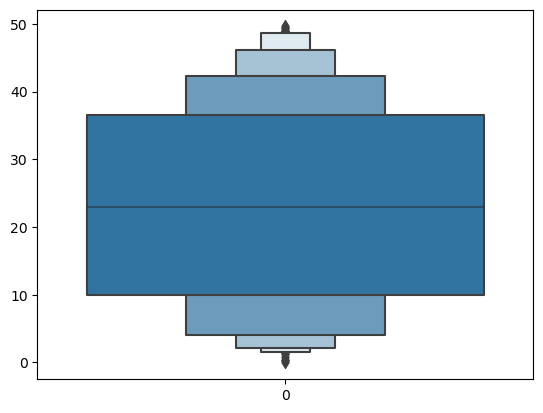

In [9]:
sns.boxenplot(df["Radio"]) # Checking for outlier

## Step 4 : Feature Engineering

### To find outliers

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_tail = Q1- 1.5 * IQR
upper_tail = Q3+ 1.5 * IQR

outliers = (df < lower_tail) | (df > upper_tail)
outliers_count = outliers.sum()
outliers_count

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

### To replace outliers

In [11]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Newspaper"]
Finding_outliar1(df,columns)

-35.775000000000006
93.625


## Step 5 : Feature Selection

In [13]:
#pearson's coeff of correalation R = -1 to +1
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059325,0.901208
Radio,0.054809,1.000000,0.355953,0.349631
Newspaper,0.059325,0.355953,1.000000,0.160959
Sales,0.901208,0.349631,0.160959,1.000000


### Assumption 1.Linearity 

<Axes: >

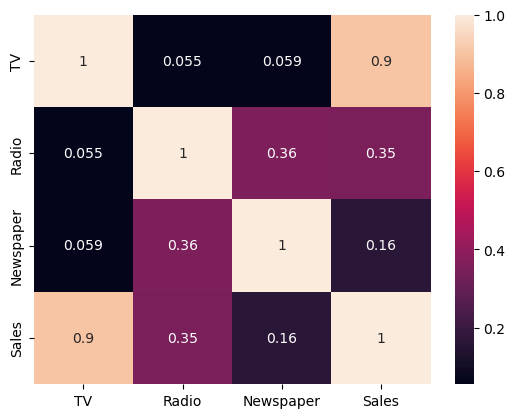

In [15]:
sns.heatmap(df.corr(), annot = True) #annot: numbers on heatmap 

### Assumption 2.No multicolinearity

In [16]:
df1 = df.drop(["Sales"],axis =1) 
df1.head()
df1.shape

(200, 3)

In [24]:
vif = []
for i in range(df1.shape[1]):
    vif_cal = variance_inflation_factor(df1.to_numpy(),i)
    vif.append(vif_cal)
vif

[2.5004017799446303, 3.304735462292136, 3.1158159627360607]

## Step 6 : model training  

### train test split

In [27]:
x = df1
y = df["Sales"]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state = 0) 
#test_size : splitting data into 80%(Training):20%(Testing), random_state: randomly choose 10rows

In [78]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [79]:
lin_reg_model = lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

### Training data

In [80]:
ytrain_predict = lin_reg_model.predict(xtrain)

In [81]:
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
 
mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
 
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
 
R2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",R2score)
 

Mean squared Error =  2.267666971744265
Mean absolute Error =  1.19270338897578
Root Mean squared Error =  1.505877475674653
R2 score =  0.913205889770576


### Testing data

In [82]:
ytest_predict = lin_reg_model.predict(xtest)

In [83]:
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
 
mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
 
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
 
R2score = r2_score(ytest,ytest_predict)
print("R2 score = ",R2score)
 

Mean squared Error =  4.520715317369828
Mean absolute Error =  1.4151430392250552
Root Mean squared Error =  2.1261973843859905
R2 score =  0.8645604358136074


 ### Model Training Decision Tree Regressor

In [84]:
dec_tree = DecisionTreeRegressor()
dec_tree_model = dec_tree.fit(xtrain,ytrain)
dec_tree_model

DecisionTreeRegressor()

### Training

In [85]:
ytrain_pred = dec_tree_model.predict(xtrain)

In [86]:
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
mae1 = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
rmse1 = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
r2score1 = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)

Mean squared Error =  2.267666971744265
Mean absolute Error =  1.4151430392250552
Root Mean squared Error =  2.1261973843859905
R2 score =  0.919912733436391


### Testing

In [87]:
ytest_pred = dec_tree_model.predict(xtest)
ytest_pred

array([10.5,  9.7, 13.2, 25.5, 16.4, 12.6, 12. , 18.4,  8. , 17.1, 25.4,
       13.2, 15.6, 20.9, 12. , 11.5, 19.8,  8.7, 12.6, 17.4, 25.5, 11.9,
       17.5, 11.9,  9.4, 17.2, 17.1, 22.3, 16.5,  6.6, 10.8, 23.8, 19.8,
       21.5,  5.5,  7. ,  9.7, 17.1, 10.4,  6.6])

In [88]:
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print()
mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print()
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()
r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)
print()

Mean squared Error =  4.520715317369828

Mean absolute Error =  1.4151430392250552

Root Mean squared Error =  2.1261973843859905

R2 score =  0.8645604358136074



#  Hyperparameter Tunning

In [89]:
hyperparameters = {
    "criterion" : ["squared_error","absolute_error"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [90]:
Randomsearch = RandomizedSearchCV(dec_tree_model,hyperparameters,cv=5)
Randomsearch

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [91]:
Randomsearch.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [92]:
Randomsearch.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=9)

In [93]:
hyper_model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=18)

In [94]:
hyper_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=18)

### Training

In [95]:
ytrain_pred_hyper = hyper_model.predict(xtrain)

In [96]:
mse = mean_squared_error(ytrain,ytrain_pred_hyper)
print("Mean squared Error = ",mse)
mae = mean_absolute_error(ytrain,ytrain_pred_hyper)
print("Mean absolute Error = ",mae)
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
r2score = r2_score(ytrain,ytrain_pred_hyper)
print("R2 score = ",r2score)

Mean squared Error =  1.8296464708947848
Mean absolute Error =  1.0522398303450935
Root Mean squared Error =  1.3526442514182304
R2 score =  0.9299709615854355


### Testing

In [97]:
ytest_pred_hyper = hyper_model.predict(xtest)

In [98]:
mse = mean_squared_error(ytest,ytest_pred_hyper)
print("Mean squared Error = ",mse)
print()
mae = mean_absolute_error(ytest,ytest_pred_hyper)
print("Mean absolute Error = ",mae)
print()
rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print()
r2score = r2_score(ytest,ytest_pred_hyper)
print("R2 score = ",r2score)
print()

Mean squared Error =  3.3889668500359207

Mean absolute Error =  1.4281442849913242

Root Mean squared Error =  1.8409146775545902

R2 score =  0.8984673528440528

